In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import activity data from Excel file
activity_df = pd.read_excel(r'C:\Users\ashka\Downloads\DA201.2\activity (1).xlsx', parse_dates=['dt'])

# Import groups data from Excel file
groups_df = pd.read_excel(r'C:\Users\ashka\Downloads\DA201.2\groups.xlsx', parse_dates=['join_dt'])

# Import users data from Excel file
users_df = pd.read_excel(r'C:\Users\ashka\Downloads\DA201.2\users.xlsx')
users_df = users_df.rename(columns={'id': 'uid'})

In [119]:
print(activity_df.isnull().sum())
print(activity_df.dtypes)
print(activity_df.describe())
print(activity_df.value_counts())
print(groups_df.isnull().sum())
print(groups_df.dtypes)
print(groups_df.describe())
print(groups_df.value_counts())
print(users_df.isnull().sum())
print(users_df.dtypes)
print(users_df.describe())
print(users_df.value_counts())

uid        0
dt         0
device    10
spent      0
dtype: int64
uid                int64
dt        datetime64[ns]
device            object
spent            float64
dtype: object
                uid        spent
count  2.233000e+03  2233.000000
mean   1.024961e+06    74.142960
std    1.429434e+04    92.638056
min    1.000039e+06     0.340320
25%    1.012788e+06    33.900000
50%    1.024733e+06    56.010000
75%    1.037457e+06    90.690000
max    1.049973e+06  1659.400000
uid      dt          device  spent 
1000039  2023-02-04  A       36.65     1
1032793  2023-02-06  I       204.69    1
1032608  2023-01-26  A       98.87     1
1032615  2023-01-25  A       56.90     1
1032680  2023-01-26  A       58.79     1
                                      ..
1016640  2023-01-30  A       12.18     1
1016632  2023-02-02  A       114.09    1
1016617  2023-02-02  I       69.58     1
1016583  2023-01-25  A       56.42     1
1049973  2023-01-31  A       85.93     1
Length: 2223, dtype: int64
uid       

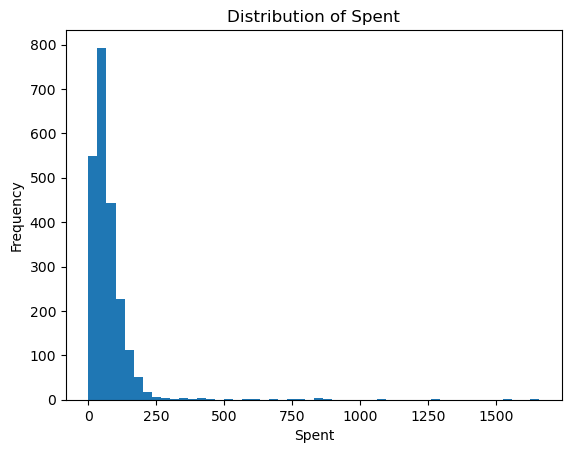

In [120]:
plt.hist(activity_df['spent'], bins=50)
plt.title('Distribution of Spent')
plt.xlabel('Spent')
plt.ylabel('Frequency')
plt.show()

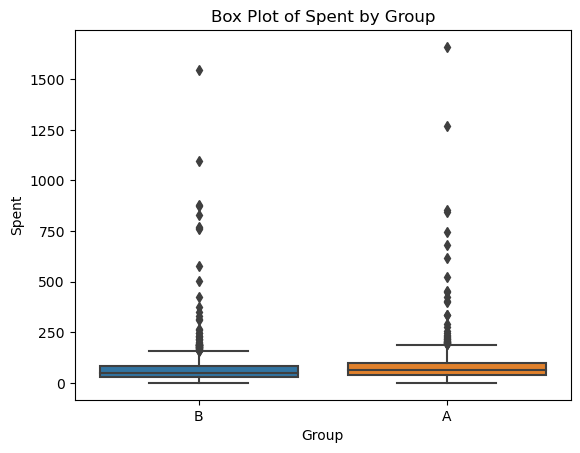

In [121]:
# Merge the activity_df and groups_df tables on the 'uid' column
merged_df = pd.merge(activity_df, groups_df, on='uid')

# Create a box plot of the spent column by group
sns.boxplot(x='group', y='spent', data=merged_df)
plt.title('Box Plot of Spent by Group')
plt.xlabel('Group')
plt.ylabel('Spent')
plt.show()

In [94]:
groups_df['group'].value_counts()


B    24600
A    24343
Name: group, dtype: int64

In [145]:
from scipy import stats
# Group activity_df by date and count unique users who made a purchase
daily_purchasers = activity_df[activity_df['spent'] > 0].groupby('dt')['uid'].nunique()

# Calculate mean and standard deviation of daily purchasers
mean_purchasers = daily_purchasers.mean()
std_purchasers = daily_purchasers.std(ddof=1)

# Calculate confidence interval using t-distribution with alpha=0.05
n = len(daily_purchasers)
t = stats.t.ppf(1 - 0.05/2, n - 1)
se_purchasers = std_purchasers / np.sqrt(n)
ci_purchasers = t * se_purchasers
lower_bound = mean_purchasers - ci_purchasers
upper_bound = mean_purchasers + ci_purchasers

# Print daily purchaser count and confidence interval
print(f"Daily purchasers:\n{daily_purchasers}\n")
print(f"Mean daily purchasers: {mean_purchasers:.2f}")
print(f"Confidence interval: ({lower_bound:.2f}, {upper_bound:.2f})")



Daily purchasers:
dt
2023-01-25    385
2023-01-26    315
2023-01-27    263
2023-01-28    213
2023-01-29    167
2023-01-30    162
2023-01-31    158
2023-02-01    119
2023-02-02     92
2023-02-03     95
2023-02-04     86
2023-02-05     81
2023-02-06     97
Name: uid, dtype: int64

Mean daily purchasers: 171.77
Confidence interval: (113.25, 230.29)


In [146]:
# Merge users_df and groups_df
merged_df = pd.merge(users_df, groups_df, left_on='uid', right_on='uid')

# Group merged_df by date and group
daily_groups = merged_df.groupby(['join_dt', 'group'])['uid'].nunique().reset_index()
print(daily_groups)
# Pivot daily_groups to get counts by group and date
daily_groups = daily_groups.pivot(index='join_dt', columns='group', values='uid').reset_index()

# Fill missing values with 0
daily_groups = daily_groups.fillna(0)

# Calculate total users and proportion for each group by date
daily_groups['total_users'] = daily_groups['A'] + daily_groups['B']
daily_groups['prop_B'] = daily_groups['B'] / daily_groups['total_users']
daily_groups['prop_A'] = daily_groups['A'] / daily_groups['total_users']


# Calculate confidence interval using normal approximation with alpha=0.05
n_B = daily_groups['B']
n_total = daily_groups['total_users']
se_prop = np.sqrt(daily_groups['prop_B'] * (1 - daily_groups['prop_B']) * (1 / n_B + 1 / n_total))
z = stats.norm.ppf(1 - 0.05/2)
daily_groups['ci_low'] = daily_groups['prop_B'] - z * se_prop
daily_groups['ci_high'] = daily_groups['prop_B'] + z * se_prop

# Print daily_groups
print(daily_groups)




      join_dt group   uid
0  2023-01-25     A  5733
1  2023-01-25     B  5913
2  2023-01-26     A  4114
3  2023-01-26     B  4156
4  2023-01-27     A  3062
5  2023-01-27     B  2981
6  2023-01-28     A  2310
7  2023-01-28     B  2233
8  2023-01-29     A  1765
9  2023-01-29     B  1802
10 2023-01-30     A  1444
11 2023-01-30     B  1450
12 2023-01-31     A  1187
13 2023-01-31     B  1205
14 2023-02-01     A   983
15 2023-02-01     B  1074
16 2023-02-02     A   927
17 2023-02-02     B   876
18 2023-02-03     A   774
19 2023-02-03     B   876
20 2023-02-04     A   743
21 2023-02-04     B   725
22 2023-02-05     A   663
23 2023-02-05     B   673
24 2023-02-06     A   638
25 2023-02-06     B   636
group    join_dt     A     B  total_users    prop_B    prop_A    ci_low  \
0     2023-01-25  5733  5913        11646  0.507728  0.492272  0.492081   
1     2023-01-26  4114  4156         8270  0.502539  0.497461  0.483906   
2     2023-01-27  3062  2981         6043  0.493298  0.506702  0.471366  

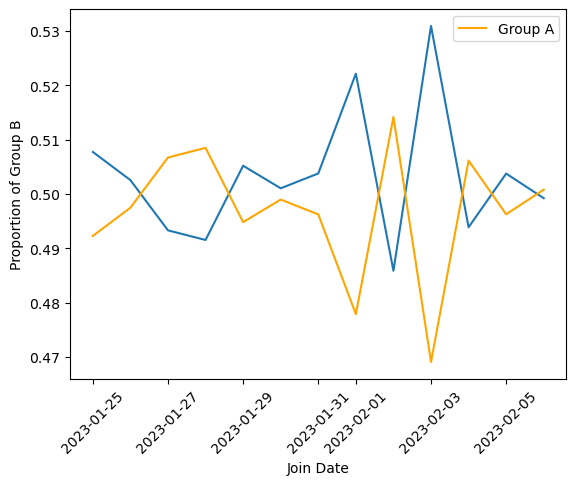

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create line plot of daily users by group
sns.lineplot(data=daily_groups, x='join_dt', y='prop_B')

# Add confidence intervals
#plt.fill_between(daily_groups['join_dt'], daily_groups['ci_low'], daily_groups['ci_high'], alpha=0.2)
# Create line plot of proportion of group A on a daily basis
sns.lineplot(data=daily_groups, x='join_dt', y='prop_A', color='orange', label='Group A')

# Set x-label
plt.xlabel('Join Date')
plt.xticks(rotation=45)
# Set y-label
plt.ylabel('Proportion of Group B')

# Show plot
plt.show()



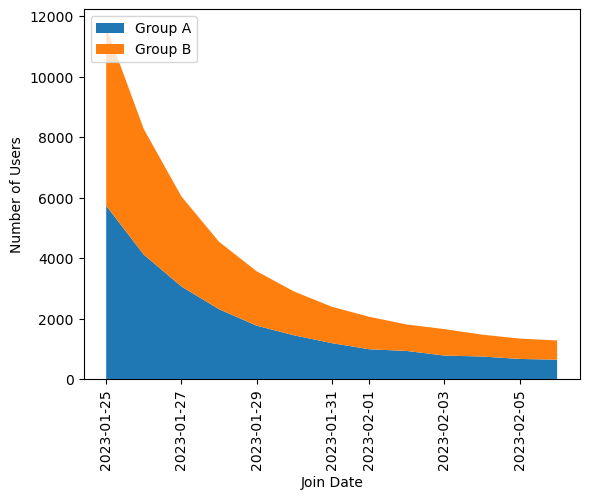

In [148]:
# Create stacked area plot of daily users by group
plt.stackplot(daily_groups['join_dt'], daily_groups['A'], daily_groups['B'], labels=['Group A', 'Group B'])

# Set x-label
plt.xlabel('Join Date')
plt.xticks(rotation=90)

# Set y-label
plt.ylabel('Number of Users')

# Add legend
plt.legend(loc='upper left')

# Show plot
plt.show()


In [149]:
#users_df = users_df.rename(columns={'id': 'uid'})
# Merge users_df and groups_df based on uid
merged_df = pd.merge(users_df, groups_df, on='uid')

# Merge with activity_df based on uid
merged_df = pd.merge(merged_df, activity_df, on='uid')

# Calculate average spending per user in control group
control_spending = merged_df.loc[merged_df['group'] == 'A', 'spent'].mean()

# Calculate average spending per user in treatment group
treatment_spending = merged_df.loc[merged_df['group'] == 'B', 'spent'].mean()

print(control_spending, treatment_spending)

81.01173872267435 68.42930834191166


In [150]:
# merge users_df and groups_df based on uid
df = pd.merge(users_df, groups_df, on='uid', how='left')

# merge activity_df with df based on uid
df = pd.merge(df, activity_df, on='uid', how='left')


In [151]:
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49082 entries, 0 to 49081
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   uid       49082 non-null  int64         
 1   country   48435 non-null  object        
 2   gender    42200 non-null  object        
 3   group     49082 non-null  object        
 4   join_dt   49082 non-null  datetime64[ns]
 5   device_x  48787 non-null  object        
 6   dt        2233 non-null   datetime64[ns]
 7   device_y  2223 non-null   object        
 8   spent     2233 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


uid             0
country       647
gender       6882
group           0
join_dt         0
device_x      295
dt          46849
device_y    46859
spent       46849
dtype: int64

In [152]:
df_conversion = df[(df['group'] == 'A') | (df['group'] == 'B')]

# calculate the number of unique users in each group
num_users = df.groupby('group')['uid'].nunique()

# calculate the number of unique users who made a purchase in each group
num_purchased = df[df['spent'] > 0].groupby('group')['uid'].nunique()

# calculate the conversion rate in each group
conversion_rate = num_purchased / num_users

# print the results
print(conversion_rate)

group
A    0.039231
B    0.046301
Name: uid, dtype: float64


In [153]:
# Set up the parameters
alpha = 0.05
DIM = 0.01

# Calculate the pooled standard error
se_pooled = np.sqrt(conversion_rate[0]*(1-conversion_rate[0])/num_users[0] + conversion_rate[1]*(1-conversion_rate[1])/num_users[1])

# Calculate the z-score
z_score = (conversion_rate[1] - conversion_rate[0] - DIM) / se_pooled

# Calculate the p-value
p_value = 1 - stats.norm().cdf(z_score)

# Determine whether to reject or fail to reject the null hypothesis
if p_value < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")



Fail to reject null hypothesis


In [154]:
# Calculate conversion rates by demographic factors
conversion_by_country = df.groupby(['group', 'country'])['spent'].agg(['mean', 'count'])
conversion_by_gender = df.groupby(['group', 'gender'])['spent'].agg(['mean', 'count'])

# Print the results
print(conversion_by_country)
print(conversion_by_gender)


                     mean  count
group country                   
A     AUS       78.029231     13
      BRA       80.432015    192
      CAN       70.837442     39
      DEU       96.739130     67
      ESP       74.891724     29
      FRA       80.651252     51
      GBR       69.732275     44
      MEX       89.950328     88
      TUR       88.496874     77
      USA       79.480531    395
B     AUS       68.538235     17
      BRA       73.160078    194
      CAN       64.835577     52
      DEU       54.951562     96
      ESP       74.913962     43
      FRA       51.081586     69
      GBR      108.387387     62
      MEX       69.354001    141
      TUR       64.201457     73
      USA       66.194556    457
                   mean  count
group gender                  
A     F       81.259028    553
      M       81.061749    279
      O       82.815181     27
B     F       71.393676    582
      M       64.761432    411
      O       82.240157     29


Text(0, 0.5, 'Spending')

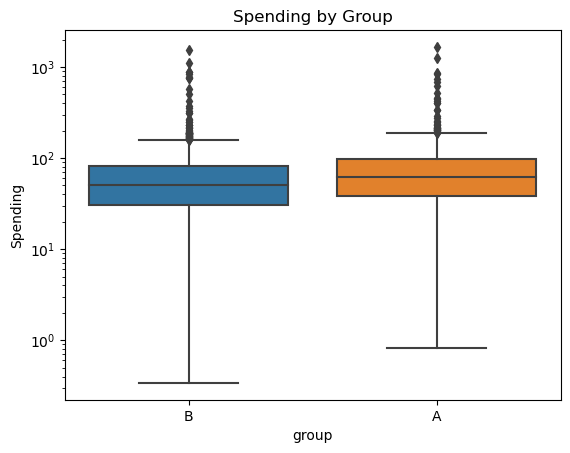

In [163]:
# Create boxplots of spending by group
ax = sns.boxplot(x='group', y='spent', data=df)
plt.yscale('log')

ax.set_title('Spending by Group')
ax.set_ylabel('Spending')


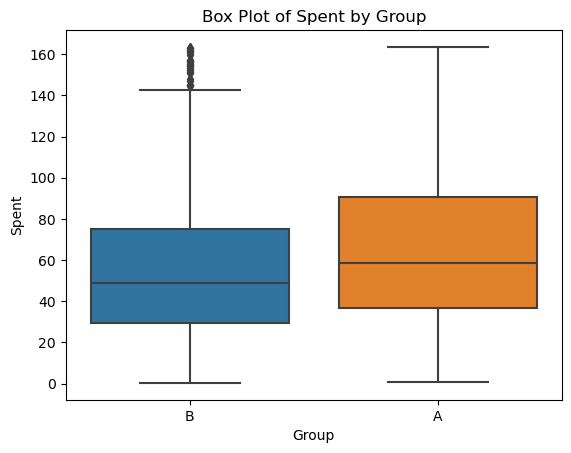

In [167]:
q1 = merged_df['spent'].quantile(0.25)
q3 = merged_df['spent'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
merged_df = merged_df[(merged_df['spent'] >= lower_bound) & (merged_df['spent'] <= upper_bound)]
sns.boxplot(x='group', y='spent', data=merged_df)
plt.title('Box Plot of Spent by Group')
plt.xlabel('Group')
plt.ylabel('Spent')
plt.show()


In [166]:
# Perform a two-sample t-test
results = stats.ttest_ind(df_conversion[df['group'] == 'A']['spent'], df[df['group'] == 'B']['spent'])

# Print the results
print('t-statistic: {:.2f}'.format(results.statistic))
print('p-value: {:.2f}'.format(results.pvalue))


t-statistic: nan
p-value: nan


C:\Users\ashka\AppData\Local\Temp\ipykernel_20940\2391640435.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results = stats.ttest_ind(df_conversion[df['group'] == 'A']['spent'], df[df['group'] == 'B']['spent'])


In [157]:
print('Missing values in group A:', df[df['group'] == 'A']['spent'].isnull().sum())
print('Missing values in group B:', df[df['group'] == 'B']['spent'].isnull().sum())


Missing values in group A: 23388
Missing values in group B: 23461


In [158]:
# make a copy of the original data frame
df_copy = df.copy()

# drop rows with missing values for relevant columns
df_conversion = df_conversion.dropna(subset=['spent'])
df_b = df[df['group'] == 'B'].dropna(subset=['spent'])

# perform two-sample t-test
results = stats.ttest_ind(df_conversion[df_conversion['group'] == 'A']['spent'], df_b['spent'])

# print results
print('t-statistic: {:.2f}'.format(results.statistic))
print('p-value: {:.2f}'.format(results.pvalue))

# continue with further analysis on the original data frame



t-statistic: 3.20
p-value: 0.00


In [159]:
mean_spending_a = df_copy[df_copy['group'] == 'A']['spent'].mean()
mean_spending_b = df_copy[df_copy['group'] == 'B']['spent'].mean()

difference = mean_spending_b - mean_spending_a
print(difference)

-12.582430380762688


In [160]:
# Calculate the mean spending for each group where spent is greater than zero
mean_spending = df[df['spent'] > 0].groupby('group')['spent'].mean()

# Print the results
print(mean_spending)


group
A    81.011739
B    68.429308
Name: spent, dtype: float64


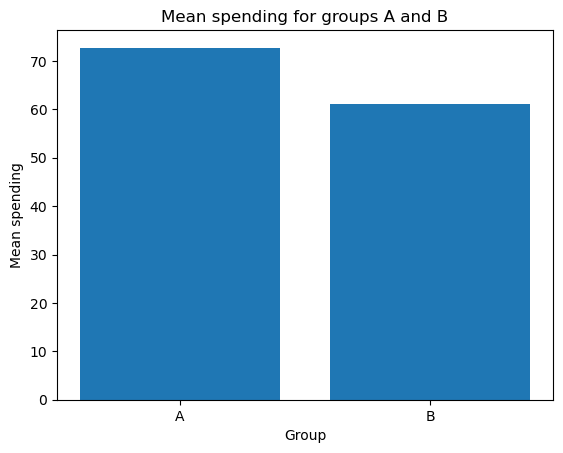

In [161]:
# Calculate the z-scores for spending in each group
z_scores_a = (df_copy[df_copy['group'] == 'A']['spent'] - df_copy[df_copy['group'] == 'A']['spent'].mean()) / df_copy[df_copy['group'] == 'A']['spent'].std()
z_scores_b = (df_copy[df_copy['group'] == 'B']['spent'] - df_copy[df_copy['group'] == 'B']['spent'].mean()) / df_copy[df_copy['group'] == 'B']['spent'].std()

# Set the threshold for outliers
threshold = 3

# Remove outliers from group A
df_a_filtered = df_copy[df_copy['group'] == 'A'][abs(z_scores_a) < threshold]

# Remove outliers from group B
df_b_filtered = df_copy[df_copy['group'] == 'B'][abs(z_scores_b) < threshold]

# Calculate the mean spending for each group
mean_spending_a = df_a_filtered['spent'].mean()
mean_spending_b = df_b_filtered['spent'].mean()

# Plot the mean spending for each group

plt.bar(['A', 'B'], [mean_spending_a, mean_spending_b])
plt.xlabel('Group')
plt.ylabel('Mean spending')
plt.title('Mean spending for groups A and B')
plt.show()


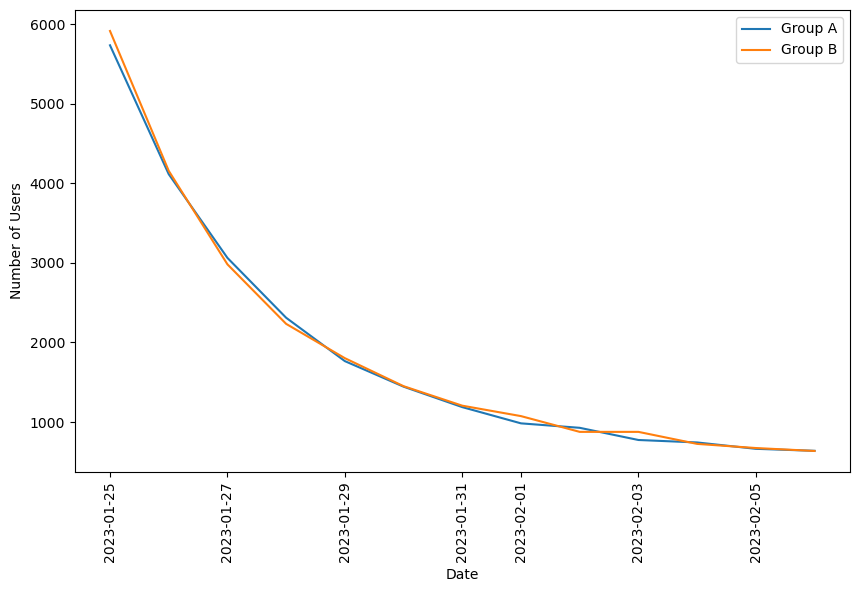

In [162]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the number of users in group A and group B over time
plt.plot(daily_groups['join_dt'], daily_groups['A'], label='Group A')
plt.plot(daily_groups['join_dt'], daily_groups['B'], label='Group B')

# Set the x-axis label
plt.xlabel('Date')
plt.xticks(rotation=90)

# Set the y-axis label
plt.ylabel('Number of Users')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [1]:
import os
print(os.getcwd())


C:\Users\ashka
